<a href="https://colab.research.google.com/github/shuaib-202408003/NLP/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenN

<ipython-input-6-368d5fcf4b94>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.dropna(inplace=True)


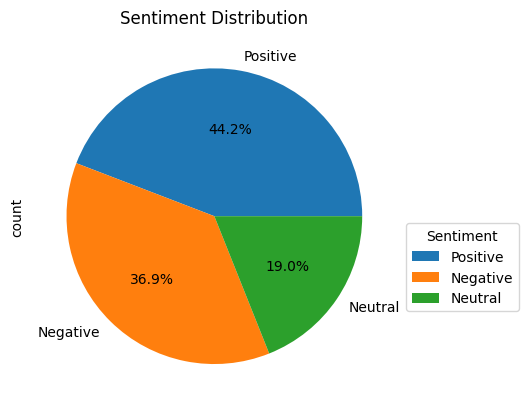

----------------------------------------------------------------------------------------------------


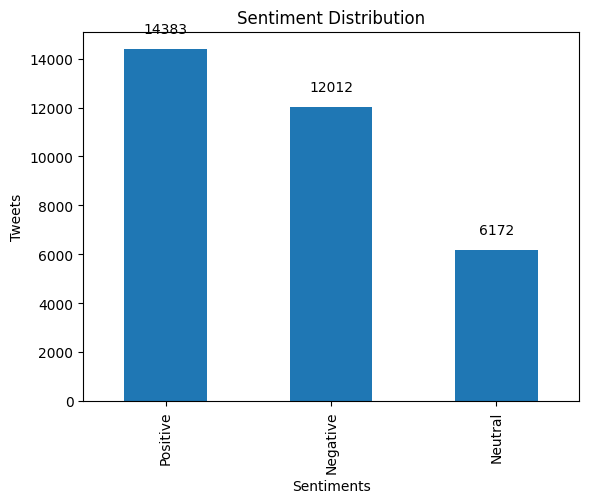

----------------------------------------------------------------------------------------------------
--------------------------------------------------
Tokenized Tweets:
0        [menyrbie, philgahan, chrisitv, httpstcoifz9fa...
1        [advice, talk, to, your, neighbours, family, t...
2        [coronavirus, australia, woolworths, to, give,...
5        [as, news, of, the, regionâs, first, confirme...
6        [cashier, at, grocery, store, was, sharing, hi...
                               ...                        
41147    [yâall, really, shitting, that, much, more, a...
41149    [still, shocked, by, the, number, of, toronto,...
41150    [i, never, that, weâd, be, in, a, situation, ...
41152    [airline, pilots, offering, to, stock, superma...
41156    [tartiicat, well, newused, rift, s, are, going...
Name: OriginalTweet, Length: 32567, dtype: object
--------------------------------------------------

Tweets without Stopwords:
0        [menyrbie, philgahan, chrisitv, httpstcoifz9

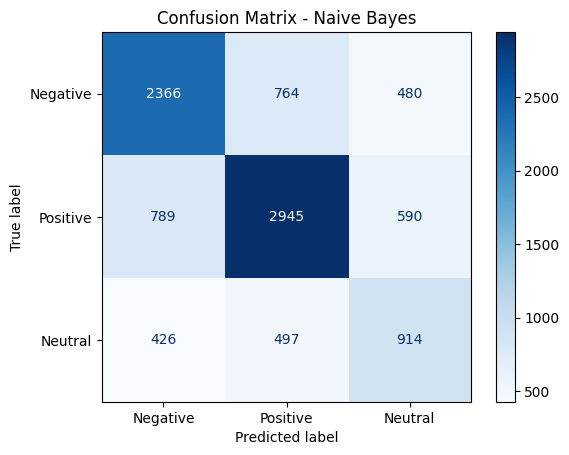

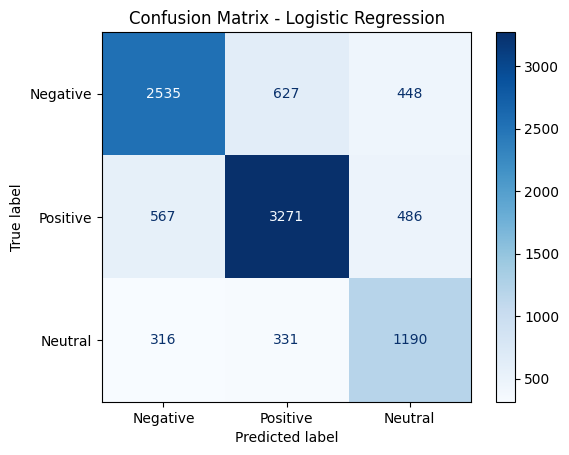

In [6]:
import nltk
import string
import re
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Corona_NLP_train.csv', encoding = 'ISO-8859-1')
print(data.head())

print(data.info())
print('--' * 50)
data_new = data[['Location', 'Sentiment', 'OriginalTweet','TweetAt']]

#Data Cleaning & lowercasting
data_new.dropna(inplace=True)
data_new = data_new[(data_new['OriginalTweet'] != '') & (data_new['OriginalTweet'].notnull())]
data_new['OriginalTweet'] = data_new['OriginalTweet'].str.lower()

data_new['Sentiment'] = data_new['Sentiment'].replace('Extremely Negative', 'Negative')
data_new['Sentiment'] = data_new['Sentiment'].replace('Extremely Positive', 'Positive')
data_new = data_new[(data_new['Sentiment'] != '') & (data_new['Sentiment'].notnull())]

shape = data.shape
print("Dataset Shape = {}".format(shape))
print('--' * 50)
# using dataframe.shape
shape = data_new.shape

#Plot Pie Chart
data_new['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.legend(title="Sentiment", loc="best", bbox_to_anchor=(1, 0.5))
plt.show()
print('--' * 50)
#Plot bar Chart
ax = data_new['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.ylabel('Tweets')
plt.xlabel('Sentiments')
# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 9),  # Offset label from bar
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)
plt.show()

print('--' * 50)
#Text Preprocessing
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

tweets = data_new['OriginalTweet']
labels = data_new['Sentiment']

#remove Punctuations
tweets = tweets.apply(remove_punctuation)
data_new.head()
print('-' * 50)

#Tokenization
tweets = tweets.apply(word_tokenize)
print("Tokenized Tweets:")
print(tweets)
print('-' * 50)

stop_words = set(stopwords.words('english'))

# Remove stopwords
tweets = tweets.apply(lambda tokens:
 [word for word in tokens
  if word.lower() not in stop_words])
print("\nTweets without Stopwords:")
print(tweets)
print('-' * 50)

# Lemmatization
lemmatizer = WordNetLemmatizer()
tweets = tweets.apply(lambda tokens:
 [lemmatizer.lemmatize(word) for word in tokens])
print("\nLemmatized Tweets:")
print(tweets)
print('-' * 50)

tweets1 = tweets

# PO TAGGING
tweets = [' '.join(tweet) if isinstance(tweet, list) else str(tweet) for tweet in tweets]

# POS Tagging Function
def pos_tag_tweets(tweet):
    doc = nlp(tweet)
    return [(token.text, token.pos_) for token in doc]

# POS Method Execution
tweets = [pos_tag_tweets(tweet) for tweet in tweets]

# POS Output
for i, tags in enumerate(tweets[:5]):
    print(f"Tweet {i + 1} POS Tags:")
    print(tags)
    print("-" * 50)



#Classification with Bag of words with ngrams (POS Tagging + Ngrams + BOW)

# Managing Tweets for BOG & N-Grams
if isinstance(tweets, list):
    tweets = pd.Series(tweets)

# Manage POS-tagged tuples or plain token lists for BOW & N-Grams Representation
if isinstance(tweets.iloc[0][0], tuple):
    tweets = tweets.apply(lambda tokens: ' '.join([word for word, pos in tokens]))
elif isinstance(tweets.iloc[0], list):
    tweets = tweets.apply(lambda tokens: ' '.join(tokens))

labels = data_new['Sentiment']

sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
labels = labels.map(sentiment_mapping)

# Use Bag of Words with Ngrams
vectorizer = CountVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(tweets)
y = labels

# BOW & N-Gram Output
print(f"Tweets Vectorization using BOG & N-Grams")
for i, twt in enumerate(X[:5]):
    print(twt)
    print("-" * 50)


# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Pred & Evaluate
y_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes Classification Report:\n",
      classification_report(y_test, y_pred, target_names=sentiment_mapping.keys()))
print('--' * 30)
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=200, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict and Evaluate Logistic Regression
y_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred)
logistic_classification_rep = classification_report(y_test, y_pred,
                                                    target_names=sentiment_mapping.keys())

print("Logistic Regression Accuracy:", logistic_accuracy)
print("\nLogistic Regression Classification Report:\n", logistic_classification_rep)

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_model.predict(X_test))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb,
                                 display_labels=["Negative", "Positive", "Neutral"])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, logistic_model.predict(X_test))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                                 display_labels=["Negative", "Positive", "Neutral"])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [7]:
# Named Entity Representation (NER)
tweets2 = tweets1
# Managing Tokenized words into strings
tweets2 = tweets2.apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)

# NER Function
def apply_ner(tweet):
    doc = nlp(tweet)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Processing NER
tweets2 = tweets2.apply(apply_ner)

# Display NER results
for i, entities in enumerate(tweets2[:5]):
    print(f"Tweet {i + 1} Entities:")
    print(entities)
    print("-" * 50)



Tweet 1 Entities:
[('menyrbie', 'GPE'), ('httpstcoifz9fan2pa httpstcoxx6ghgfzcc', 'PERSON')]
--------------------------------------------------
Tweet 2 Entities:
[]
--------------------------------------------------
Tweet 3 Entities:
[('coronavirus australia', 'ORG'), ('covid19', 'PERSON')]
--------------------------------------------------
Tweet 4 Entities:
[('first', 'ORDINAL'), ('covid19', 'PERSON'), ('sullivan county', 'GPE'), ('last week', 'DATE')]
--------------------------------------------------
Tweet 5 Entities:
[('covid19', 'PERSON')]
--------------------------------------------------
